# 第34讲 sympy代数运算、画图、求导与积分、积分变换运算

## sympy的子包


algebras (代数)
assumptions (假设)
benchmarks (测试)
calculus (微积分)
categories (范畴)
codegen (代码生成)
combinatorics (组合)
concrete (delta运算)
core (核心)
crypto (加密)
deprecated (丢弃)
diffgeom (微分几何)
discrete (离散)
external (外部)
functions (函数)

galgebra（群代数）
geometry (几何)
holonomic (完整函数)
integrals (积分)
interactive (交互)
liealgebras (李代数)
logic (逻辑)
matrices (矩阵)
multipledispatch (多重分派)
ntheory (数论)
parsing (语法解析)
physics (物理)
plotting (画图)

polys (多边形)
printing (打印)
sandbox (沙箱)
series (级数)
sets (集合)
simplify (简化)
solvers (方程求解)
stats (统计)
strategies (策略)
tensor (张量)
unify (联合)
utilities (工具)
vector (向量)

## 代数运算

符号对象代数运算(expand,together,factor,apart,simplify,trigsimp,powsimp,radsimp,logcombine)

1. 导入sympy相关子包或函数， 用var()定义用到的所有符号

2. 对以符号、内嵌函数为基本元素的表达式运算

In [1]:
# 多项式展开
import  sympy as sy;
sy.var('x,y,a,b,c')
z=(x+y)**3;
z.expand()

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [2]:
#通分
z=1/(x+y) +1/(2*x+3*y);z.together()


(3*x + 4*y)/((x + y)*(2*x + 3*y))

In [3]:
#简化
z=(x+y)**2-(x-y)**2+4;
z.simplify()

4*x*y + 4

In [4]:
#分解因式
z=x**4 - 10*x**3 + 35*x**2 - 50*x + 24 
z.factor()

(x - 4)*(x - 3)*(x - 2)*(x - 1)

In [5]:
#部分分式
z=2*x/(x-1)/(x+1);
z.apart()    

1/(x + 1) + 1/(x - 1)

In [6]:
#三角函数简化
z=sy.cos(x+y)*sy.cos(x-y)-sy.sin(x+y)*sy.sin(x-y)
sy.trigsimp(z)

cos(2*x)

In [7]:
#有理化简化(通过去掉平方根使分母有理化)
e=e=((2+2*sy.sqrt(2))*x+(2+sy.sqrt(8))*y)/(2+sy.sqrt(2))
sy.radsimp(e)

sqrt(2)*(x + y)

In [8]:
#同底同幂简化
sy.powsimp(x**y*x**z*y**z, combine='base', force=True)

x**y*(x*y)**(-sin(x - y)*sin(x + y) + cos(x - y)*cos(x + y))

In [9]:
#对数运算简化
e=a*sy.log(x) + b*sy.log(y) - c*sy.log(z)
sy.logcombine(e,force=True)

log(x**a*y**b*(-sin(x - y)*sin(x + y) + cos(x - y)*cos(x + y))**(-c))

# sympy.plotting画平面曲线图

plot,plot_implicit,plot_parametric,textplot

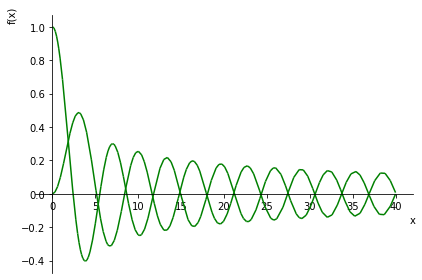

In [1]:
from sympy import plotting as pt;
import sympy as sy
sy.var('x y t')
#画函数曲线
pt.plot(sy.besselj(0,x),sy.besselj(2,x),(x,0,40),line_color='green')

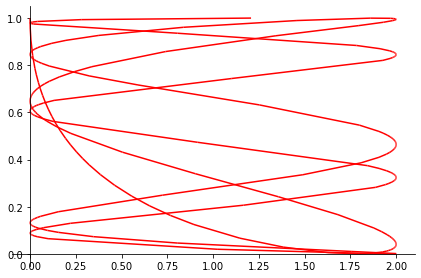

In [11]:
#画参数曲线
pt.plot_parametric(1-sy.cos(t**2),1-sy.sin(t)**2,(t,0,2*sy.pi),line_color='red')

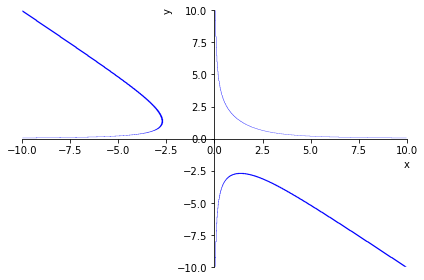

In [12]:
#画隐函数曲线
pt.plot_implicit(x*y**2+x**2*y-5,(x,-10,10),(y,-10,10))

In [13]:
#画字符形状曲线
pt.textplot(0.5*x+sy.sin(x),0,20)#画图范围是0,20，而不是(x,0,20)

     11 |                                                      /
        |                                                     / 
        |                                                    /  
        |                                                   /   
        |                                                  /    
        |                                      ....      ..     
        |                                     /    ......       
        |                                    /                  
        |                                   /                   
        |                                  /                    
    5.5 |--------------------------------..---------------------
        |                     .....     /                       
        |                   ..     .....                        
        |                  /                                    
        |                 /                                     
        |                

## 求复变函数在奇异点处的残(留)数
residue(f(z),z,a)


In [14]:
import sympy as sy
sy.var('z x  y')

def f(z):
    return sy.exp(2*z)/(z**2+1)/(z**2-1)

b=[1,-1,-sy.I,sy.I]
for a in b:
    r=sy.residue(f(z),z,a)
    print(r,'=',r.evalf())

exp(2)/4 = 1.84726402473266
-exp(-2)/4 = -0.0338338208091532
-I*exp(-2*I)/4 = -0.22732435670642 + 0.104036709136786*I
I*exp(2*I)/4 = -0.22732435670642 - 0.104036709136786*I


## sympy.plotting画三维曲线曲面图
plot3d,plot3d_parametric_line,plot3d_parametric_surface

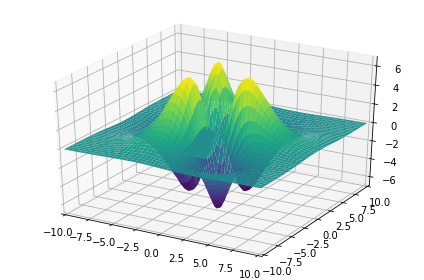

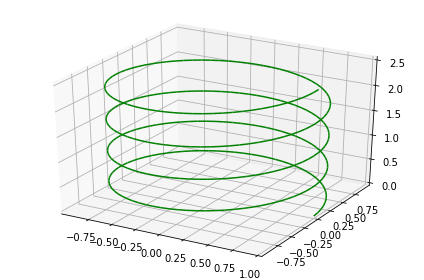

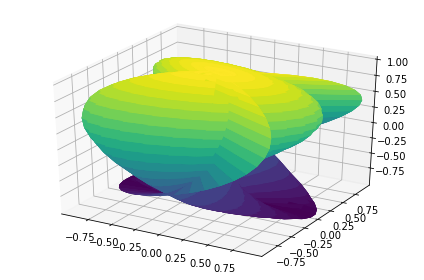

In [15]:
from sympy import plotting as pt;import sympy as sy;sy.var('x y z u v')
#画三维（open）曲面
pt.plot3d(5*(x**3-3*x*y**2)*sy.exp(-sy.sqrt(x**2+y**2)),(x,-10,10),(y,-10,10))
#画三维空间参数曲线
pt.plot3d_parametric_line(sy.cos(t),sy.sin(t),0.2*t*0.5,(t,0,8*sy.pi),line_color='green')
#画三维参数（close）曲面
pt.plot3d_parametric_surface(sy.sin(3*u)*sy.cos(4*v),sy.sin(2*u)*sy.sin(3*v),sy.cos(2*u),(u,0, sy.pi),(v,0,2*sy.pi),adaptive=False,nb_of_points=500)

## 求极限limit(expr(x),x,x0)与求导数diff(f(x),x,n)

In [16]:
import sympy as sy
sy.var('x y z a')
#求极限
sy.limit(sy.sin(x)/x,x,0)

1

In [17]:
sy.limit((1+x)**(1/x),x,sy.oo)

1

In [18]:
sy.limit((1+x)**(1/x),x,0)

E

In [19]:
#内嵌函数求导数
sy.diff(sy.cos(2*x)**2,x).simplify()

-2*sin(4*x)

In [20]:
#无定义抽象函数求导
f=sy.Function('f')# 声明f是自变量任意的函数
g=sy.Function('g')(x)# 声明g是自变量x的函数
sy.diff(f(x),x,x),sy.diff(g,x)    

(Derivative(f(x), (x, 2)), Derivative(g(x), x))

In [21]:
#调用Derivative求导，需要设定evaluate=True
sy.Derivative(sy.tanh(x),x,x,evaluate=True)    

2*(tanh(x)**2 - 1)*tanh(x)

In [22]:
sy.Derivative(sy.tanh(x),x,x)#默认evaluate=False不求导   

Derivative(tanh(x), (x, 2))

In [23]:
sy.diff(x**5,x,4)#求4阶导数    

120*x

## 幂级数series展开和周期函数的fourier_series级数展开

In [24]:
import sympy as sy
sy.var('x y ')
f=sy.Function('f')
# 函数的幂级数展开
sy.series(1/(1+x),x,0,10)

1 - x + x**2 - x**3 + x**4 - x**5 + x**6 - x**7 + x**8 - x**9 + O(x**10)

In [25]:
sy.series(2*x/(1+x**2),x,0,6)

2*x - 2*x**3 + 2*x**5 + O(x**6)

In [26]:
sy.series(1/(x*(x-1)),x,1,3)

1/(x - 1) - 2 - (x - 1)**2 + x + O((x - 1)**3, (x, 1))

In [27]:
import sympy as sy
sy.var('x y')
#周期信号三角级数展开
s=sy.fourier_series(sy.pi**2-x**2,(x,-sy.pi,sy.pi)).truncate(4)
s

4*cos(x) - cos(2*x) + 4*cos(3*x)/9 + 2*pi**2/3

In [28]:
s=sy.fourier_series(sy.Heaviside(x),(x,-1,1)).truncate(4)
s

2*sin(pi*x)/pi + 2*sin(3*pi*x)/(3*pi) + 2*sin(5*pi*x)/(5*pi) + 1/2

In [29]:
sy.fourier_series(sy.Heaviside(x+0.5)-sy.Heaviside(x-0.5),(x,-1,1)).truncate(3)

2*cos(pi*x)/pi - 2*cos(3*pi*x)/(3*pi) + 0.5

## 定积分integrate(f(x),(x,a,b))和不定积分integrate(f(x),x)

In [30]:
import sympy as sy
sy.var('x y z')
#定积分
sy.integrate(x**2,(x,-2,2))

16/3

In [31]:
s=sy.integrate(sy.sin(x**2),(x,0,sy.pi)).simplify();
s

sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*sqrt(pi))/2

In [32]:
s.evalf()#计算函数值

0.772651712690066

In [33]:
t=sy.integrate(1/sy.sqrt(1-3*sy.cos(x)**2/4),(x,0,sy.pi/2)).simplify()
t

2*Integral(1/sqrt(4 - 3*cos(x)**2), (x, 0, pi/2))

In [34]:
t.evalf()

2.15651564749964

In [35]:
import sympy as sy;
sy.var('x y')
#不定积分
sy.integrate(sy.cos(x)**2,x)

x/2 + sin(x)*cos(x)/2

In [36]:
sy.integrate(sy.besselj(1,x),x)

-besselj(0, x)

In [37]:
w=sy.integrate(sy.jn(1,x),x);
w

-jn(0, x)

In [38]:
sy.integrate(sy.erf(x),x)

x*erf(x) + exp(-x**2)/sqrt(pi)

In [39]:
p=sy.integrate(sy.exp(-x**2),x);
p

sqrt(pi)*erf(x)/2

In [40]:
p.subs(x,5).evalf()

0.886226925451395

## 傅里叶变换fourier_transform && 拉普拉斯变换laplace_Transform

In [41]:
import sympy as sy;
sy.var('w,t')
sy.fourier_transform(sy.Heaviside(t+2)-sy.Heaviside(t-2),t,w)

sin(4*pi*w)/(pi*w)

In [42]:
def u(t):
    return sy.Heaviside(t)#单位阶跃信号
def tri(t):
    return (t/2+1)*u(t+2)-t*u(t)+(t/2-1)*u(t-2)#单个三角波
sy.fourier_transform(tri(t),t,w)


-(exp(8*I*pi*w) - 2*exp(4*I*pi*w) + 1)*exp(-4*I*pi*w)/(8*pi**2*w**2)

In [43]:
sy.var('n',integer=True,positive=True);
sy.var('s')
sy.laplace_transform(t**n,t,s)

(s**(-n - 1)*factorial(n), 0, True)

In [44]:
sy.laplace_transform(sy.cos(4*t)*sy.exp(2*t),t,s)

((s - 2)/((s - 2)**2 + 16), -oo, Abs(2*arg(2 - s) + 2*pi) < pi)

In [45]:
sy.laplace_transform(sy.DiracDelta(t),t,s)

(1 - Heaviside(0), -oo, True)